In [2]:
import numpy as np
import matplotlib.cm as cm
from matplotlib import ticker
import math
import scipy
from scipy import spatial
import matplotlib.pyplot as plt
import matplotlib
import xarray as xr
import dask
from sklearn.neighbors import KDTree
import netCDF4
from metpy import calc
from metpy.units import units
import matplotlib.cm as cm
import warnings
warnings.filterwarnings("ignore")
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

from scipy.integrate import odeint
from scipy.integrate import solve_ivp

In [3]:
fz = 15*1.5
lw = 4
siz = 100
XNNA = 1.25 # Abscissa where architecture-constrained network will be placed
XTEXT = 0.25 # Text placement
YTEXT = 0.3 # Text placement

plt.rc('text', usetex=False)
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
#mpl.rcParams["font.serif"] = "STIX"
plt.rc('font', family='serif', size=fz)
matplotlib.rcParams['lines.linewidth'] = lw

In [4]:
global_z_space = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/model_graphs/latent_space/Trackable_2D_PCA_Latent_Space__31.npy")


Text(0.5, 1.0, '2D Latent Space Projection')

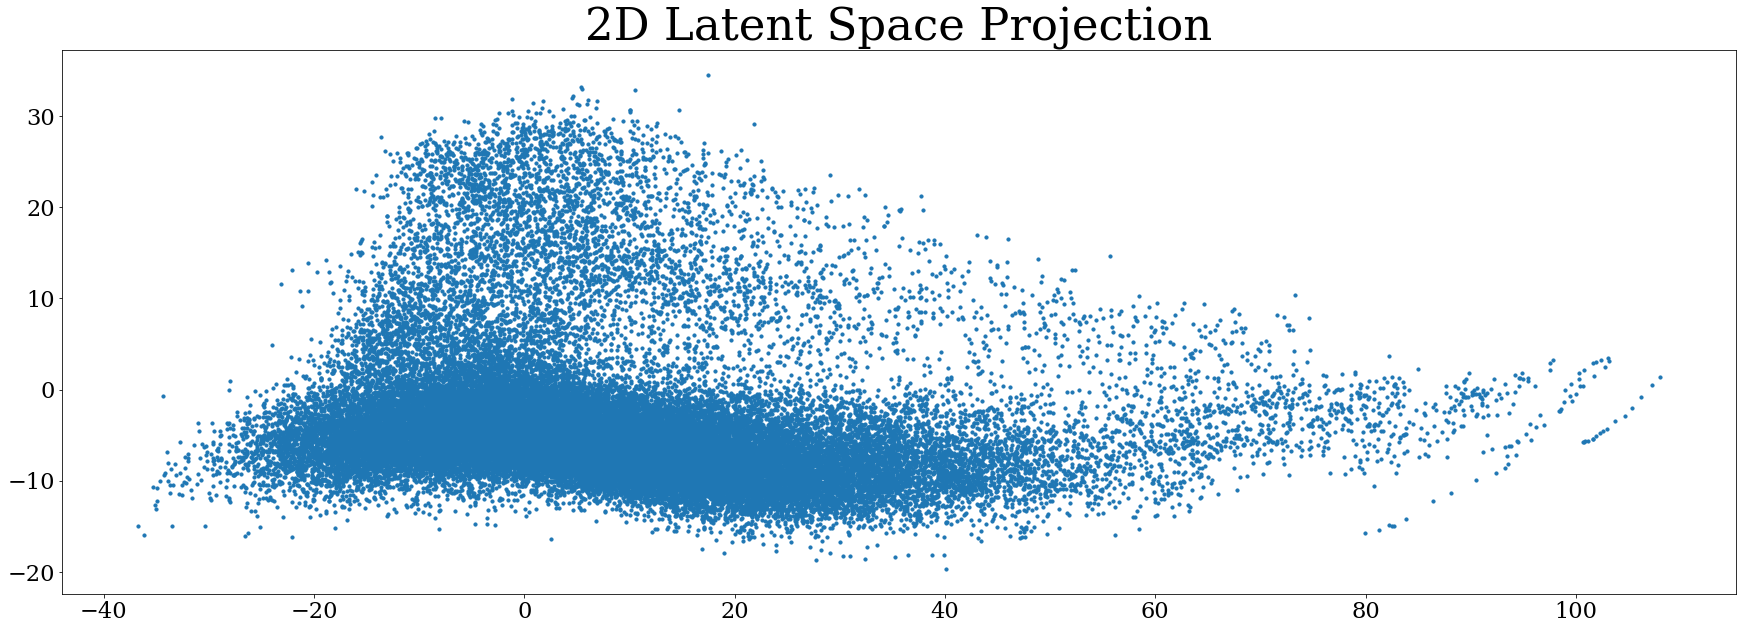

In [5]:
fig, ax = plt.subplots(figsize=(30,10))

cp = ax.scatter(x=global_z_space[:, 0], y=global_z_space[:, 1], cmap="Purples", s=10.0)
ax.set_title("2D Latent Space Projection", fontsize = fz*2.0)
#ax.set_xlim(-40,100)
#ax.set_ylim(-20,35)
#cbar = fig.colorbar(cp, pad=0.002)
#cbar.set_label(label=r"$ms^{-1}$", rotation="horizontal", fontsize=fz*1.5, labelpad=30, y = 0.55)


In [6]:
Synoptic_Amazon_Z = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/model_graphs/latent_space/Synoptic_Amazon_Point_2D_PCA_Latent_Space__31.npy")
Amazon_Test_Images = np.load("/fast/gmooers/Preprocessed_Data/Single_Amazon_Unaveraged/synoptic_amazon_point.npy")


All_Amazon_Z = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/model_graphs/latent_space/Full_Winter_Amazon_2D_PCA_Latent_Space__31.npy")
All_Amazon_Test_Images = np.load("/fast/gmooers/Preprocessed_Data/Single_Amazon_Unaveraged/trackable_all_amazon_point.npy")
All_SC_Cloud_Z = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/model_graphs/latent_space/Full_Winter_SC_Cloud_2D_PCA_Latent_Space__31.npy")
All_SC_Cloud_Test_Images = np.load("/fast/gmooers/Preprocessed_Data/Single_Amazon_Unaveraged/trackable_all_sc_point.npy")
All_Desert_Z = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/model_graphs/latent_space/Full_Winter_Desert_2D_PCA_Latent_Space__31.npy")
All_Desert_Test_Images = np.load("/fast/gmooers/Preprocessed_Data/Single_Amazon_Unaveraged/trackable_all_desert_point.npy")
All_Warm_Pool_Z = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/model_graphs/latent_space/Full_Winter_Warm_Pool_2D_PCA_Latent_Space__31.npy")
All_Warm_Pool_Test_Images = np.load("/fast/gmooers/Preprocessed_Data/Single_Amazon_Unaveraged/trackable_all_warm_pool_point.npy")


# Amazon

Text(0.5, 1.0, '2D Latent Space Projection')

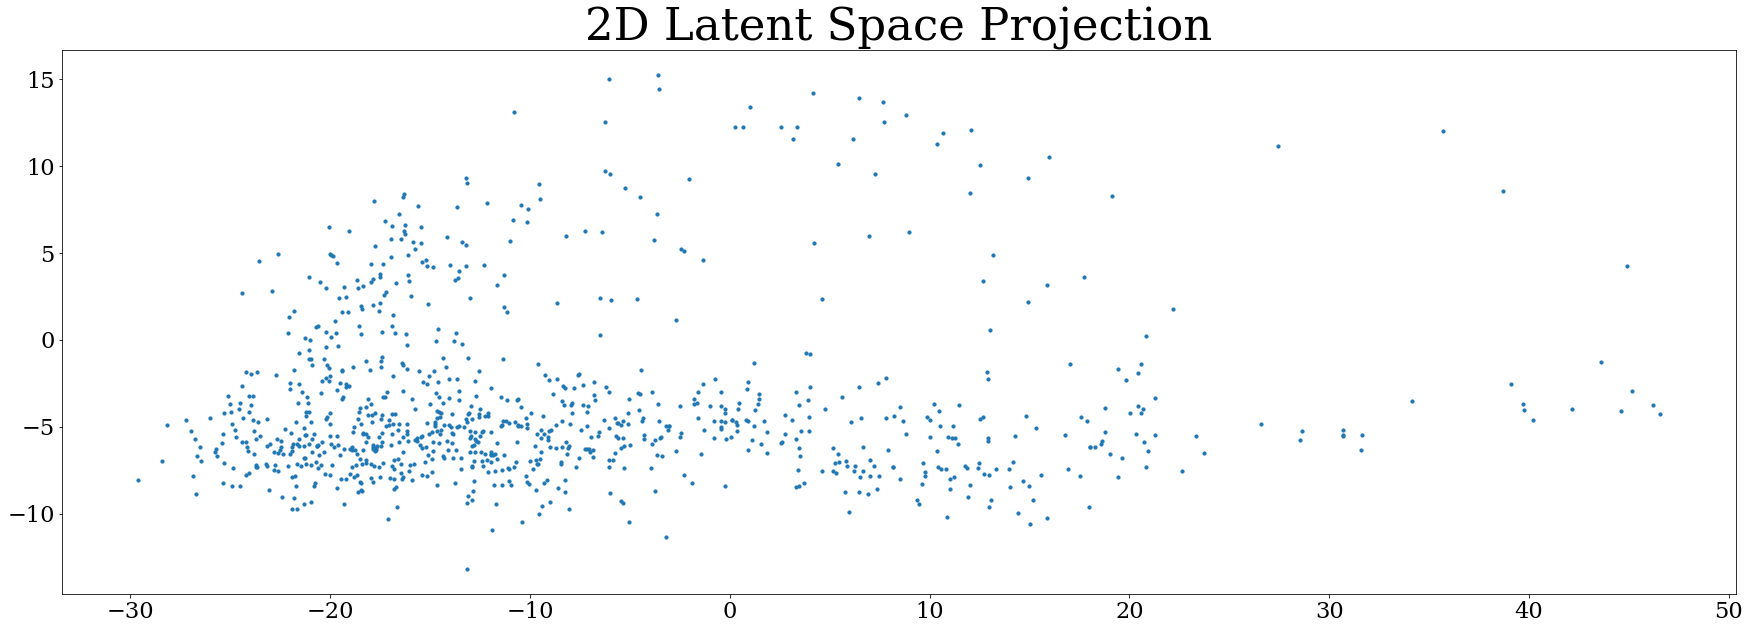

In [16]:
fig, ax = plt.subplots(figsize=(30,10))

cp = ax.scatter(x=Synoptic_Amazon_Z[:, 0], y=Synoptic_Amazon_Z[:, 1], cmap="Purples", s=10.0)
ax.set_title("2D Latent Space Projection", fontsize = fz*2.0)
#ax.set_xlim(-40,100)
#ax.set_ylim(-20,35)
#cbar = fig.colorbar(cp, pad=0.002)
#cbar.set_label(label=r"$ms^{-1}$", rotation="horizontal", fontsize=fz*1.5, labelpad=30, y = 0.55)

In [19]:
amazon_labels = np.empty(shape=(len(Synoptic_Amazon_Z)))


count = 0
for i in range(24):
    for j in range(4):
        amazon_labels[count::96] = i
        count = count+1

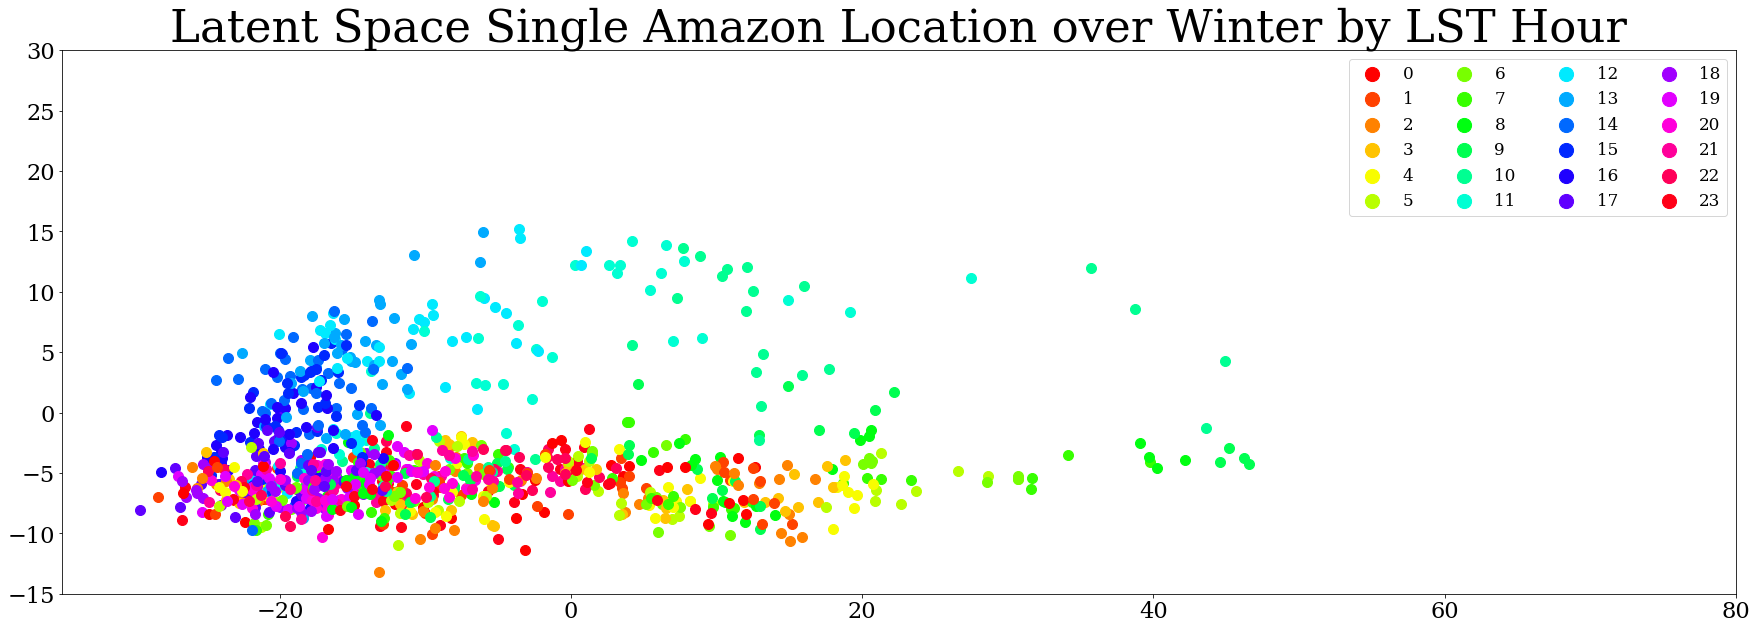

In [24]:
colors = cm.hsv(np.linspace(0, 1, 24))
fig, ax = plt.subplots(figsize=(30, 10))
ax.set_xlim(-35, 80)
ax.set_ylim(-15,30)
obs = []
for i in range(len(Synoptic_Amazon_Z)):
    if int(amazon_labels[i]) not in obs:
        obs.append(int(amazon_labels[i]))
        ax.scatter(x=Synoptic_Amazon_Z[i, 0], y=Synoptic_Amazon_Z[i, 1], c=colors[int(amazon_labels[i])], s=100.0, label = str(int(amazon_labels[i])))
    else:
        ax.scatter(x=Synoptic_Amazon_Z[i, 0], y=Synoptic_Amazon_Z[i, 1], c=colors[int(amazon_labels[i])], s=100.0)
        

                 
lgnd = ax.legend(loc="best", ncol=4, fontsize=fz*0.75)
for handle in lgnd.legendHandles:
    handle.set_sizes([200.0])
    
    

ax.set_title("Latent Space Single Amazon Location over Winter by LST Hour", fontsize=fz*2)
print(" ")

https://scipy-cookbook.readthedocs.io/items/idx_ordinary_differential_equations.html

https://scipy-cookbook.readthedocs.io/items/LoktaVolterraTutorial.html

https://ipython-books.github.io/123-simulating-an-ordinary-differential-equation-with-scipy/

https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html

https://scipy-lectures.org/intro/scipy/auto_examples/plot_odeint_simple.html

https://physics.nyu.edu/pine/pymanual/html/chap9/chap9_scipy.html

https://www.marksmath.org/visualization/orbits/CentralOrbit.html

https://stackoverflow.com/questions/32622230/solving-vector-ordinary-differential-equations-in-python-with-scipy-odeint

https://apmonitor.com/pdc/index.php/Main/SolveDifferentialEquations

(-15, 30)

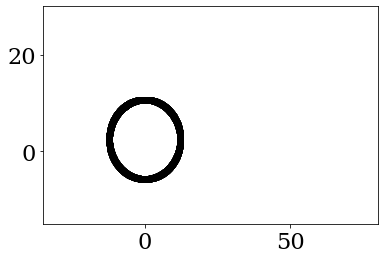

In [296]:
def func(z,t):
    x, y=z
    #perfect circle
    #return [-y/2.5, x]
    #return [-y/2.5, x/5.0]




    #return [-200.0*y, 2.0*x]
    #return [-15.0*y, 10.0*x+10*x*y]
    #return [-15.0*y, 6.0*x+10*x*y]
    #return [-15.0*y-2*x*y, 6.0*x+2*x*y]
    #return [-15.0*y-2.8*x*y, 6.0*x+2*x*y]
    #return [-11.0*y-2*x*y, 6.0*x+2.0*x*y]
    return [-y/2.5+1.0, x/5.5]
   

#z0=[-5,2]
###good one
z0=[-5,10]
t = np.linspace(0,24,960)
xx=odeint(func, z0, t)
#plt.scatter(xx[:,0],xx[:,1], color="black")
#plt.xlim(-35, 80)
#plt.ylim(-15,30)

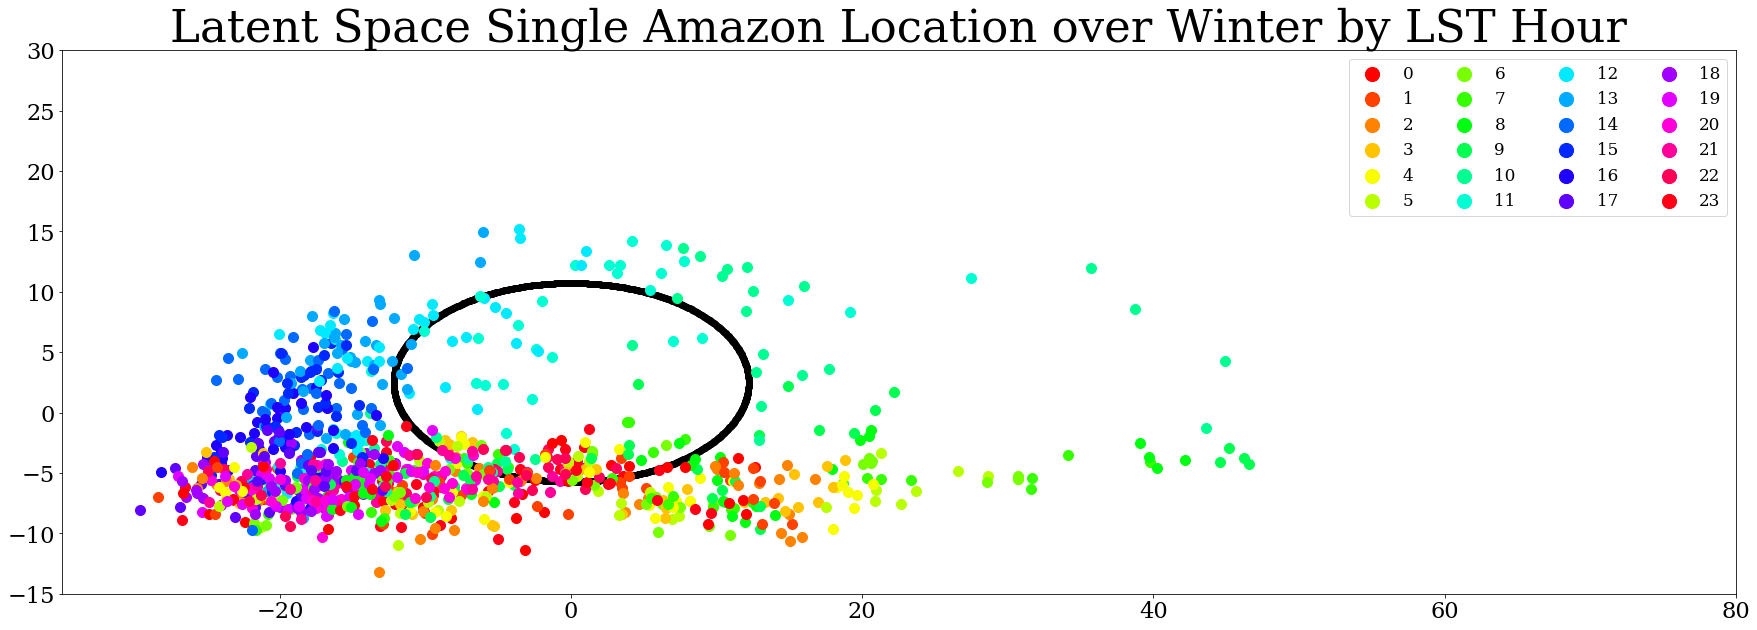

In [297]:
colors = cm.hsv(np.linspace(0, 1, 24))
fig, ax = plt.subplots(figsize=(30, 10))
plt.scatter(xx[:,0],xx[:,1], color="black")
ax.set_xlim(-35, 80)
ax.set_ylim(-15,30)
obs = []
for i in range(len(Synoptic_Amazon_Z)):
    if int(amazon_labels[i]) not in obs:
        obs.append(int(amazon_labels[i]))
        ax.scatter(x=Synoptic_Amazon_Z[i, 0], y=Synoptic_Amazon_Z[i, 1], c=colors[int(amazon_labels[i])], s=100.0, label = str(int(amazon_labels[i])))
    else:
        ax.scatter(x=Synoptic_Amazon_Z[i, 0], y=Synoptic_Amazon_Z[i, 1], c=colors[int(amazon_labels[i])], s=100.0)
        

                 
lgnd = ax.legend(loc="best", ncol=4, fontsize=fz*0.75)
for handle in lgnd.legendHandles:
    handle.set_sizes([200.0])
    
    

ax.set_title("Latent Space Single Amazon Location over Winter by LST Hour", fontsize=fz*2)
print(" ")

In [7]:
amazon_labels = np.empty(shape=(len(All_Amazon_Z)))


count = 0
for i in range(24):
    for j in range(4):
        amazon_labels[count::96] = i
        count = count+1

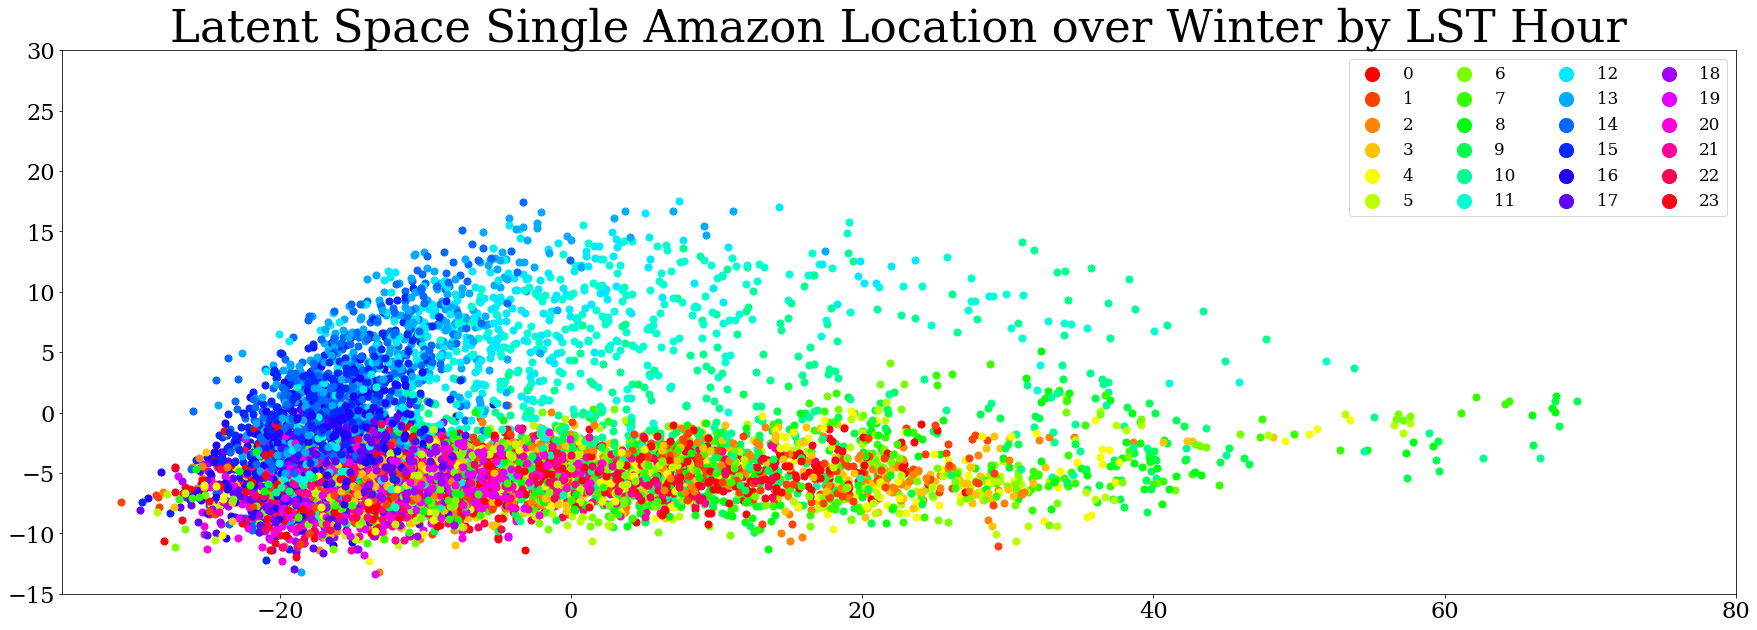

In [10]:
colors = cm.hsv(np.linspace(0, 1, 24))
fig, ax = plt.subplots(figsize=(30, 10))
#plt.scatter(xx[:,0],xx[:,1], color="black")
ax.set_xlim(-35, 80)
ax.set_ylim(-15, 30)
obs = []
for i in range(len(All_Amazon_Z)):
    if int(amazon_labels[i]) not in obs:
        obs.append(int(amazon_labels[i]))
        ax.scatter(x=All_Amazon_Z[i, 0], y=All_Amazon_Z[i, 1], c=colors[int(amazon_labels[i])], s=50.0, label = str(int(amazon_labels[i])))
    else:
        ax.scatter(x=All_Amazon_Z[i, 0], y=All_Amazon_Z[i, 1], c=colors[int(amazon_labels[i])], s=50.0)
        

                 
lgnd = ax.legend(loc="best", ncol=4, fontsize=fz*0.75)
for handle in lgnd.legendHandles:
    handle.set_sizes([200.0])
    
    

ax.set_title("Latent Space Single Amazon Location over Winter by LST Hour", fontsize=fz*2)
print(" ")

In [23]:
All_Amazon_Z.shape

(9485, 2)

# SC Cloud

In [11]:
sc_labels = np.empty(shape=(len(All_SC_Cloud_Z)))


count = 0
for i in range(24):
    for j in range(4):
        sc_labels[count::96] = i
        count = count+1

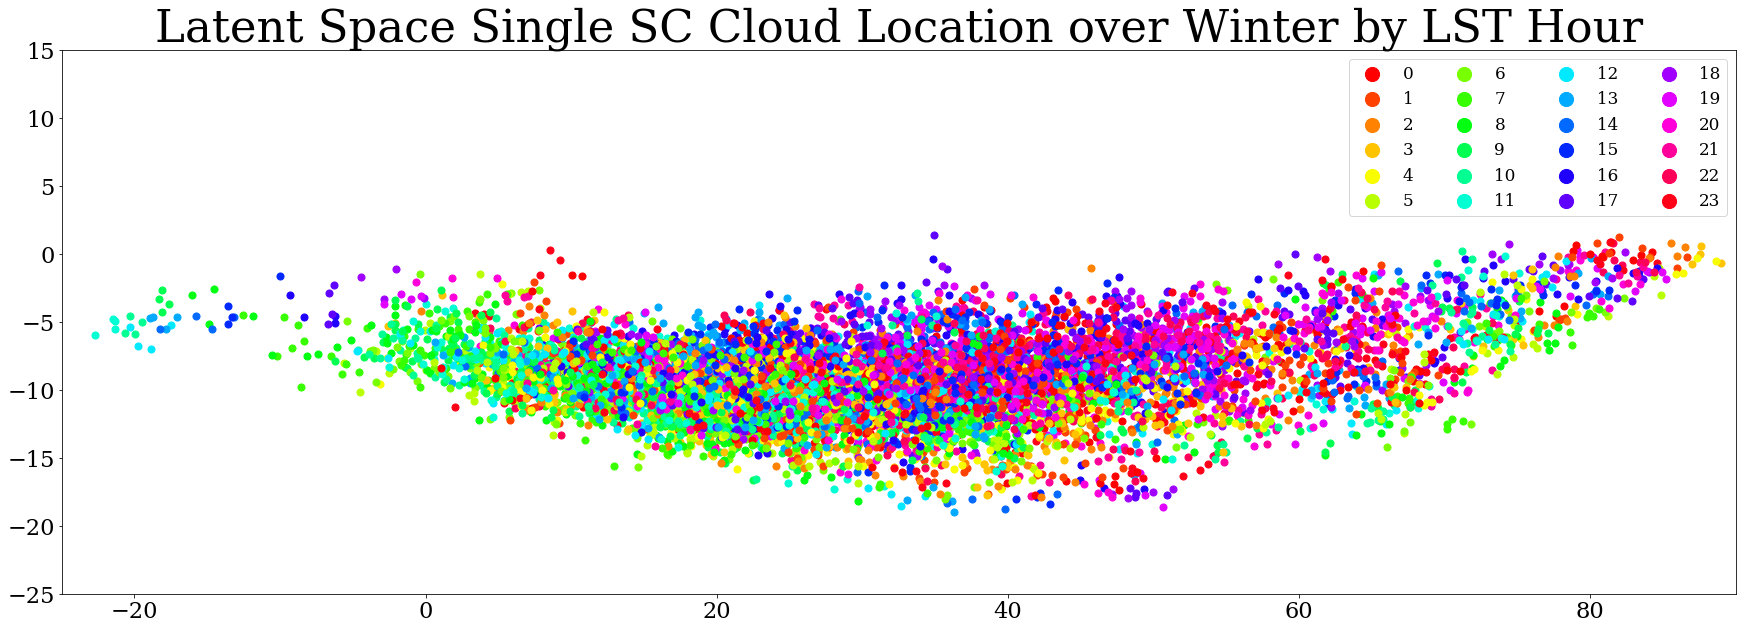

In [13]:
colors = cm.hsv(np.linspace(0, 1, 24))
fig, ax = plt.subplots(figsize=(30, 10))
#plt.scatter(xx[:,0],xx[:,1], color="black")
ax.set_xlim(-25, 90)
ax.set_ylim(-25, 15)
obs = []
for i in range(len(All_SC_Cloud_Z)):
    if int(sc_labels[i]) not in obs:
        obs.append(int(sc_labels[i]))
        ax.scatter(x=All_SC_Cloud_Z[i, 0], y=All_SC_Cloud_Z[i, 1], c=colors[int(sc_labels[i])], s=50.0, label = str(int(sc_labels[i])))
    else:
        ax.scatter(x=All_SC_Cloud_Z[i, 0], y=All_SC_Cloud_Z[i, 1], c=colors[int(sc_labels[i])], s=50.0)
        

                 
lgnd = ax.legend(loc="best", ncol=4, fontsize=fz*0.75)
for handle in lgnd.legendHandles:
    handle.set_sizes([200.0])
    
    

ax.set_title("Latent Space Single SC Cloud Location over Winter by LST Hour", fontsize=fz*2)
print(" ")

# Desert

In [14]:
desert_labels = np.empty(shape=(len(All_Desert_Z)))


count = 0
for i in range(24):
    for j in range(4):
        desert_labels[count::96] = i
        count = count+1

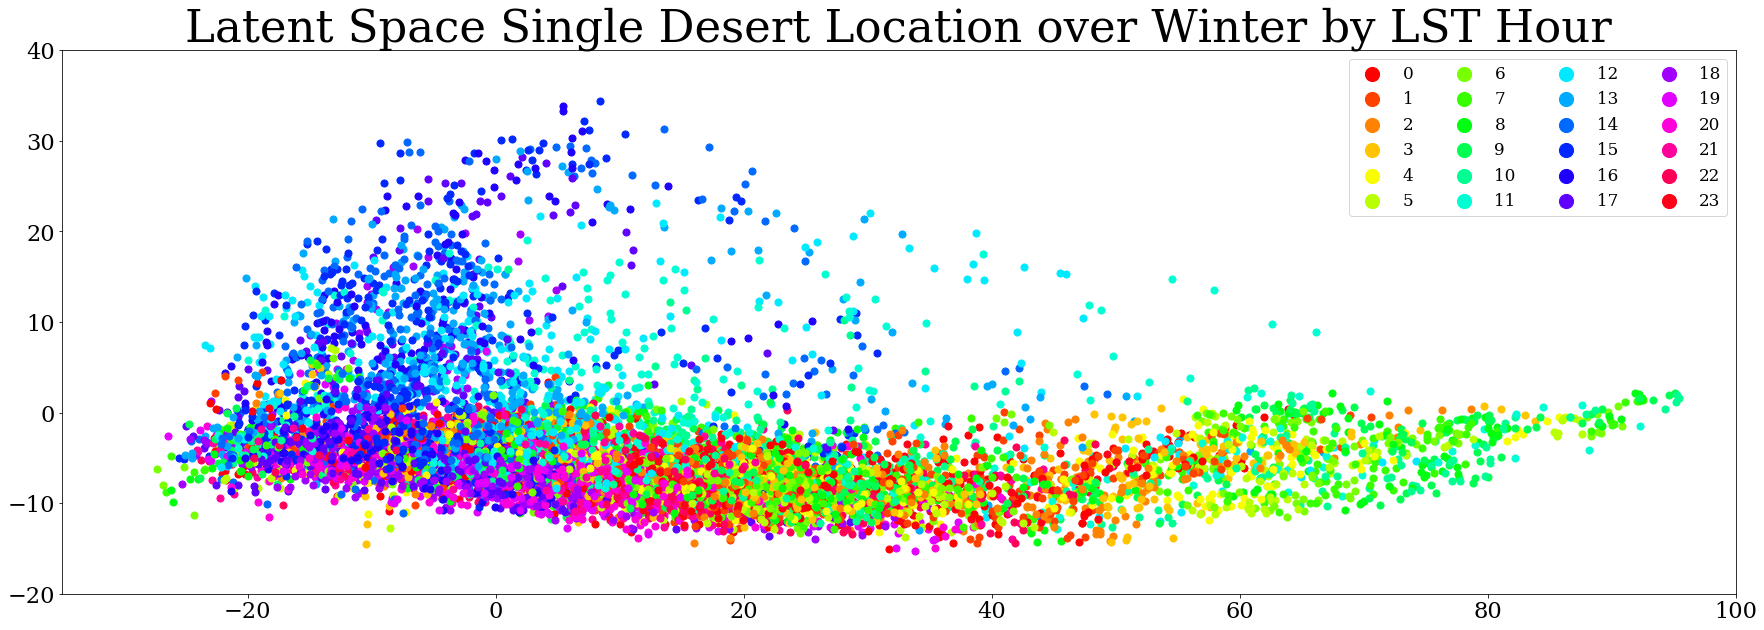

In [18]:
colors = cm.hsv(np.linspace(0, 1, 24))
fig, ax = plt.subplots(figsize=(30, 10))
#plt.scatter(xx[:,0],xx[:,1], color="black")
ax.set_xlim(-35, 100)
ax.set_ylim(-20, 40)
obs = []
for i in range(len(All_Desert_Z)):
    if int(desert_labels[i]) not in obs:
        obs.append(int(desert_labels[i]))
        ax.scatter(x=All_Desert_Z[i, 0], y=All_Desert_Z[i, 1], c=colors[int(desert_labels[i])], s=50.0, label = str(int(desert_labels[i])))
    else:
        ax.scatter(x=All_Desert_Z[i, 0], y=All_Desert_Z[i, 1], c=colors[int(desert_labels[i])], s=50.0)
        

                 
lgnd = ax.legend(loc="best", ncol=4, fontsize=fz*0.75)
for handle in lgnd.legendHandles:
    handle.set_sizes([200.0])
    
    

ax.set_title("Latent Space Single Desert Location over Winter by LST Hour", fontsize=fz*2)
print(" ")

# Warm Pool

In [19]:
warm_pool_labels = np.empty(shape=(len(All_Warm_Pool_Z)))


count = 0
for i in range(24):
    for j in range(4):
        warm_pool_labels[count::96] = i
        count = count+1

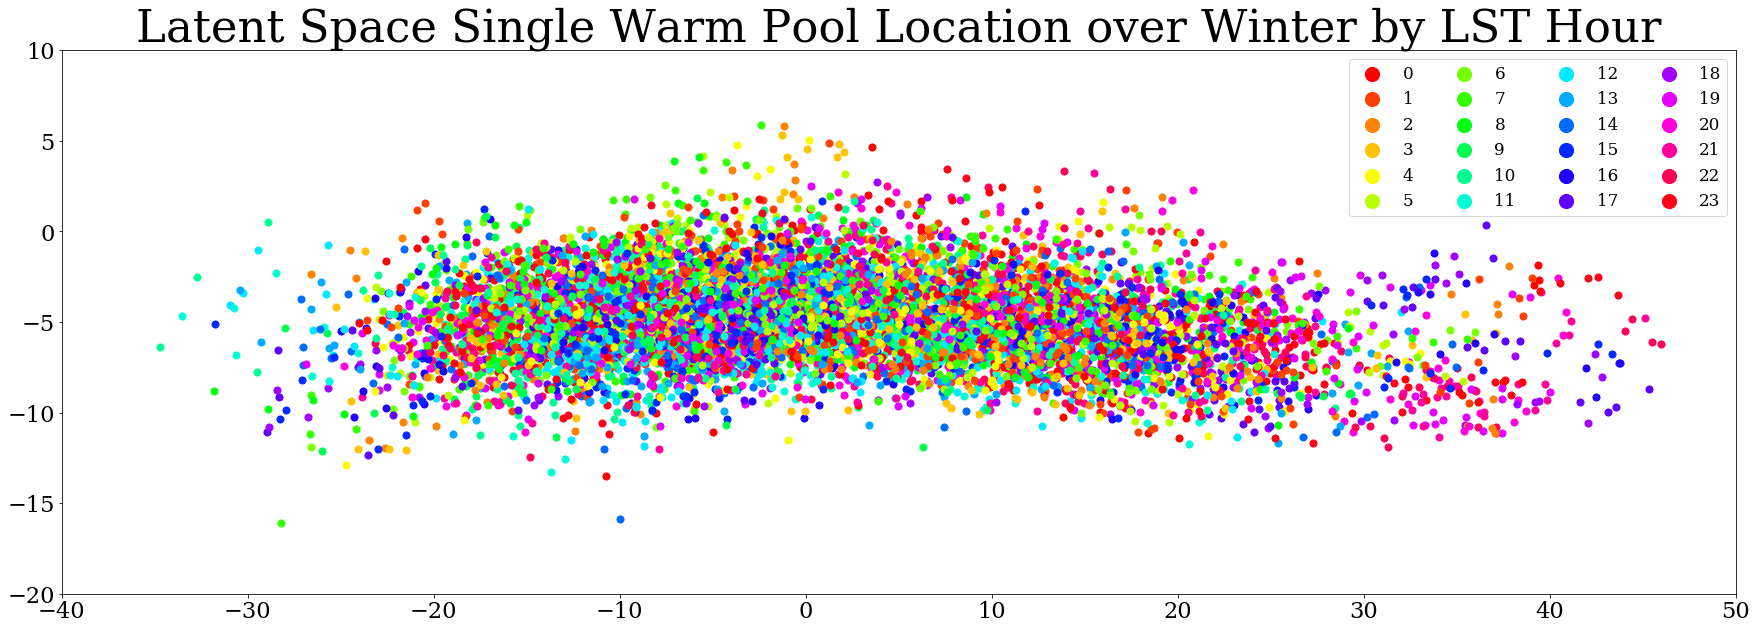

In [22]:
colors = cm.hsv(np.linspace(0, 1, 24))
fig, ax = plt.subplots(figsize=(30, 10))
#plt.scatter(xx[:,0],xx[:,1], color="black")
ax.set_xlim(-40, 50)
ax.set_ylim(-20, 10)
obs = []
for i in range(len(All_Warm_Pool_Z)):
    if int(warm_pool_labels[i]) not in obs:
        obs.append(int(warm_pool_labels[i]))
        ax.scatter(x=All_Warm_Pool_Z[i, 0], y=All_Warm_Pool_Z[i, 1], c=colors[int(warm_pool_labels[i])], s=50.0, label = str(int(warm_pool_labels[i])))
    else:
        ax.scatter(x=All_Warm_Pool_Z[i, 0], y=All_Warm_Pool_Z[i, 1], c=colors[int(warm_pool_labels[i])], s=50.0)
        

                 
lgnd = ax.legend(loc="best", ncol=4, fontsize=fz*0.75)
for handle in lgnd.legendHandles:
    handle.set_sizes([200.0])
    
    

ax.set_title("Latent Space Single Warm Pool Location over Winter by LST Hour", fontsize=fz*2)
print(" ")